<a href="https://colab.research.google.com/github/kamranr123/kamranr123.github.io/blob/master/SD_diffusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> KM Colab</h1>

In [14]:
# @title ## Choose Models
import markdown
import zipfile
import shutil
import os
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output
from importlib import reload

# ******************************************************************************
class Modelpaths:
    base_path = '/content/models'
    model = f'{base_path}/checkpoints'
    lora = f'{base_path}/loras'
    vae = f'{base_path}/vae'
    upscale = f'{base_path}/upscale_models'
    controlnet = f'{base_path}/controlnet'
    embeddings = f'{base_path}/embeddings'
    diffusers = f'{base_path}/diffusers'

    def __init__(self):
        if not os.path.exists(self.base_path):
            os.makedirs(self.model)
            os.makedirs(self.lora)
            os.makedirs(self.vae)
            os.makedirs(self.upscale)
            os.makedirs(self.embeddings)
            os.makedirs(self.diffusers)

modelpaths = Modelpaths()

%cd /content
!apt -y install -qq aria2

def download(model_link, model_name, path = ''):
    # !cd /content/gdrive/MyDrive/yourfoldername; wget civitai-link --content-disposition
    if path == '':
        path = modelpaths.model

    %cd {path}
    if path == modelpaths.model:
        !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M {model_link} --dir={path} --out={model_name}
    else:
        !aria2c --console-log-level=error -c -x 16 -s 8 -k 1M {model_link} --dir={path} --out={model_name}
# ******************************************************************************
clear_output()

!wget -q https://raw.githubusercontent.com/kamranr123/kamranr123.github.io/master/modellist.py -P /content/
import modellist
reload(modellist)
available_model_dict = modellist.available_model_dict
# ******************************************************************************
# initialize values
model = list(available_model_dict.keys())[0]
model_ver = available_model_dict[model][0]
model_name = available_model_dict[model][4]
model_link = available_model_dict[model][3] + model_name
if 'civitai.com' in model_link:
    model_link = available_model_dict[model][3]

# Define the title and link
title = "Model selection"
link = "https://github.com/NUROISEA/anime-webui-colab/wiki/Selecting-a-model"

# Generate the Markdown-formatted text
markdown_text = f"# {title} [**[?]**]({link})"

# Convert the Markdown text to HTML
html = markdown.markdown(markdown_text)
display(Markdown(html))

# Create a list of models for the first selection listbox
model_options = list(available_model_dict.keys())

# Create the first selection listbox widget for models
model_selection = widgets.Select(
    options=model_options,
    description='Choose a model:',
    style={'description_width': 'initial'}
)

# Create the second selection listbox widget for values
model_version_selection = widgets.Select(
    options = available_model_dict[model_options[0]][4:],
    description='Choose a model version:',
    style={'description_width': 'initial'}
)

# Define a function to handle the model selection change event
def on_model_selection_change(change):
    global model
    model = change['new']
    print('change')
    selected_values = available_model_dict[model][4:]
    model_version_selection.options = selected_values

# Attach the model selection change event handler
model_selection.observe(on_model_selection_change, 'value')

# Define a function to handle the model selection change event
def on_model_version_selection_change(change):
    global model_name, model_link, model_ver
    model_name = change['new']
    model_link = available_model_dict[model][3] + model_name
    model_ver = available_model_dict[model][0]
    if 'civitai.com' in model_link:
        model_link = available_model_dict[model][3]
    print("\r", end="")
    print("Selected Model: {}, Version: {}".format(model, model_name), end="")
    # print("Selected Model link: {}".format(model_link), end="")

# Attach the model version selection change event handler
model_version_selection.observe(on_model_version_selection_change, 'value')

# Display the selection listboxes
display(model_selection)
display(model_version_selection)
print("Selected Model: {}, Version: {}".format(model, model_name), end="")


<h1>Model selection <a href="https://github.com/NUROISEA/anime-webui-colab/wiki/Selecting-a-model"><strong>[?]</strong></a></h1>

Select(description='Choose a model:', options=('Stable Diffusion v1.5', 'Dark Sushi Mix', 'ExpMix Line', 'Cham…

Select(description='Choose a model version:', options=('v1-5-pruned.safetensors', 'v1-5-pruned-emaonly.safeten…

Selected Model: Stable Diffusion v1.5, Version: v1-5-pruned.safetensorschange
Selected Model: KenCanMix, Version: kencanmix_v20Beta.safetensors

In [15]:
download(model_link, model_name, modelpaths.model)

!wget -q 'https://huggingface.co/nolanaatama/colab/resolve/main/embeddings.zip' -P {modelpaths.embeddings}
with zipfile.ZipFile(f"{modelpaths.embeddings}/embeddings.zip", 'r') as zip_ref:
    zip_ref.extractall(f"{modelpaths.base_path}")
os.remove(f"{modelpaths.embeddings}/embeddings.zip")

download('https://civitai.com/api/download/models/218471', 'blackgold-000008.safetensors', modelpaths.lora)
# download('https://civitai.com/api/download/models/148629', 'edgPencilDress_MINI.safetensors', modelpaths.lora)

/content/models/checkpoints

Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
7195e5|OK  |   139MiB/s|/content/models/checkpoints/kencanmix_v20Beta.safetensors

Status Legend:
(OK):download completed.
/content/models/loras

Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
779fe4|OK  |    20MiB/s|/content/models/loras/blackgold-000008.safetensors

Status Legend:
(OK):download completed.


In [ ]:
download('https://civitai.com/api/download/models/218471', 'blackgold-000008.safetensors', modelpaths.lora)
download('https://civitai.com/api/download/models/234167', 'wrenchsfantasy-000016.safetensors', modelpaths.lora)

# Initial

In [21]:
!pip install diffusers transformers accelerate omegaconf peft
# !pip install xformers==0.0.2
import torch
from diffusers import AutoPipelineForText2Image, DiffusionPipeline, StableDiffusionPipeline
from diffusers import EulerDiscreteScheduler, EulerAncestralDiscreteScheduler, DPMSolverMultistepScheduler
from diffusers import DPMSolverSinglestepScheduler, KDPM2DiscreteScheduler, KDPM2AncestralDiscreteScheduler
from diffusers import HeunDiscreteScheduler, LMSDiscreteScheduler, DEISMultistepScheduler, UniPCMultistepScheduler

clear_output()

In [ ]:
from enum import Enum
import math
import safetensors
import torch
import re

# clip_text_custom_embedder.py
# https://gist.github.com/takuma104/43552b8ec70b63323c57dc9c6fcb9b90

re_attention = re.compile(r"""
\\\(|
\\\{|
\\\)|
\\\}|
\\\[|
\\]|
\\\\|
\\|
\(|
\{|
\[|
:([+-]?[.\d]+)\)|
\)|
\}|
]|
[^\\()\\{}\[\]:]+|
:
""", re.X)


def parse_prompt_attention(text):
    """
    Parses a string with attention tokens and returns a list of pairs: text and its assoicated weight.
    Accepted tokens are:
      (abc) - increases attention to abc by a multiplier of 1.1
      (abc:3.12) - increases attention to abc by a multiplier of 3.12
      [abc] - decreases attention to abc by a multiplier of 1.1
      \( - literal character '('
      \[ - literal character '['
      \) - literal character ')'
      \] - literal character ']'
      \\ - literal character '\'
      anything else - just text
    >>> parse_prompt_attention('normal text')
    [['normal text', 1.0]]
    >>> parse_prompt_attention('an (important) word')
    [['an ', 1.0], ['important', 1.1], [' word', 1.0]]
    >>> parse_prompt_attention('(unbalanced')
    [['unbalanced', 1.1]]
    >>> parse_prompt_attention('\(literal\]')
    [['(literal]', 1.0]]
    >>> parse_prompt_attention('(unnecessary)(parens)')
    [['unnecessaryparens', 1.1]]
    >>> parse_prompt_attention('a (((house:1.3)) [on] a (hill:0.5), sun, (((sky))).')
    [['a ', 1.0],
     ['house', 1.5730000000000004],
     [' ', 1.1],
     ['on', 1.0],
     [' a ', 1.1],
     ['hill', 0.55],
     [', sun, ', 1.1],
     ['sky', 1.4641000000000006],
     ['.', 1.1]]
    """

    res = []
    round_brackets = []
    square_brackets = []

    round_bracket_multiplier = 1.1
    square_bracket_multiplier = 1 / 1.1

    def multiply_range(start_position, multiplier):
        for p in range(start_position, len(res)):
            res[p][1] *= multiplier

    for m in re_attention.finditer(text):
        text = m.group(0)
        weight = m.group(1)

        if text.startswith('\\'):
            res.append([text[1:], 1.0])
        elif text == '(' or text == '{':
            round_brackets.append(len(res))
        elif text == '[':
            square_brackets.append(len(res))
        elif weight is not None and len(round_brackets) > 0:
            multiply_range(round_brackets.pop(), float(weight))
        elif (text == ')' or text == '}') and len(round_brackets) > 0:
            multiply_range(round_brackets.pop(), round_bracket_multiplier)
        elif text == ']' and len(square_brackets) > 0:
            multiply_range(square_brackets.pop(), square_bracket_multiplier)
        else:
            res.append([text, 1.0])

    for pos in round_brackets:
        multiply_range(pos, round_bracket_multiplier)

    for pos in square_brackets:
        multiply_range(pos, square_bracket_multiplier)

    if len(res) == 0:
        res = [["", 1.0]]

    # merge runs of identical weights
    i = 0
    while i + 1 < len(res):
        if res[i][1] == res[i + 1][1]:
            res[i][0] += res[i + 1][0]
            res.pop(i + 1)
        else:
            i += 1

    return res


class CLIPTextCustomEmbedder(object):
    def __init__(self, tokenizer, text_encoder, device,
                 clip_stop_at_last_layers=1):
        self.tokenizer = tokenizer
        self.text_encoder = text_encoder
        self.token_mults = {}
        self.device = device
        self.clip_stop_at_last_layers = clip_stop_at_last_layers

    def tokenize_line(self, line):
        def get_target_prompt_token_count(token_count):
            return math.ceil(max(token_count, 1) / 75) * 75

        id_end = self.tokenizer.eos_token_id
        parsed = parse_prompt_attention(line)
        tokenized = self.tokenizer(
            [text for text, _ in parsed], truncation=False,
            add_special_tokens=False)["input_ids"]

        fixes = []
        remade_tokens = []
        multipliers = []

        for tokens, (text, weight) in zip(tokenized, parsed):
            i = 0
            while i < len(tokens):
                token = tokens[i]
                remade_tokens.append(token)
                multipliers.append(weight)
                i += 1

        token_count = len(remade_tokens)
        prompt_target_length = get_target_prompt_token_count(token_count)
        tokens_to_add = prompt_target_length - len(remade_tokens)
        remade_tokens = remade_tokens + [id_end] * tokens_to_add
        multipliers = multipliers + [1.0] * tokens_to_add
        return remade_tokens, fixes, multipliers, token_count

    def process_text(self, texts):
        if isinstance(texts, str):
            texts = [texts]

        remade_batch_tokens = []
        cache = {}
        batch_multipliers = []
        for line in texts:
            if line in cache:
                remade_tokens, fixes, multipliers = cache[line]
            else:
                remade_tokens, fixes, multipliers, _ = self.tokenize_line(line)
                cache[line] = (remade_tokens, fixes, multipliers)

            remade_batch_tokens.append(remade_tokens)
            batch_multipliers.append(multipliers)

        return batch_multipliers, remade_batch_tokens

    def __call__(self, text):
        batch_multipliers, remade_batch_tokens = self.process_text(text)

        z = None
        i = 0
        while max(map(len, remade_batch_tokens)) != 0:
            rem_tokens = [x[75:] for x in remade_batch_tokens]
            rem_multipliers = [x[75:] for x in batch_multipliers]

            tokens = []
            multipliers = []
            for j in range(len(remade_batch_tokens)):
                if len(remade_batch_tokens[j]) > 0:
                    tokens.append(remade_batch_tokens[j][:75])
                    multipliers.append(batch_multipliers[j][:75])
                else:
                    tokens.append([self.tokenizer.eos_token_id] * 75)
                    multipliers.append([1.0] * 75)

            z1 = self.process_tokens(tokens, multipliers)
            z = z1 if z is None else torch.cat((z, z1), axis=-2)

            remade_batch_tokens = rem_tokens
            batch_multipliers = rem_multipliers
            i += 1

        return z

    def process_tokens(self, remade_batch_tokens, batch_multipliers):
        remade_batch_tokens = [[self.tokenizer.bos_token_id] + x[:75] +
                               [self.tokenizer.eos_token_id] for x in remade_batch_tokens]
        batch_multipliers = [[1.0] + x[:75] + [1.0] for x in batch_multipliers]

        tokens = torch.asarray(remade_batch_tokens).to(self.device)
        # print(tokens.shape)
        # print(tokens)
        outputs = self.text_encoder(
            input_ids=tokens, output_hidden_states=True)

        if self.clip_stop_at_last_layers > 1:
            z = self.text_encoder.text_model.final_layer_norm(
                outputs.hidden_states[-self.clip_stop_at_last_layers])
        else:
            z = outputs.last_hidden_state

        # restoring original mean is likely not correct, but it seems to work well
        # to prevent artifacts that happen otherwise
        batch_multipliers_of_same_length = [
            x + [1.0] * (75 - len(x)) for x in batch_multipliers]
        batch_multipliers = torch.asarray(
            batch_multipliers_of_same_length).to(self.device)
        # print(batch_multipliers.shape)
        # print(batch_multipliers)

        original_mean = z.mean()
        z *= batch_multipliers.reshape(batch_multipliers.shape +
                                       (1,)).expand(z.shape)
        new_mean = z.mean()
        z *= original_mean / new_mean

        return z

    def get_text_tokens(self, text):
        batch_multipliers, remade_batch_tokens = self.process_text(text)
        return [[self.tokenizer.bos_token_id] + remade_batch_tokens[0]], \
            [[1.0] + batch_multipliers[0]]


def text_embeddings_equal_len(text_embedder, prompt, negative_prompt):
    cond_embeddings = text_embedder(prompt)
    uncond_embeddings = text_embedder(negative_prompt)

    cond_len = cond_embeddings.shape[1]
    uncond_len = uncond_embeddings.shape[1]
    if cond_len == uncond_len:
        return cond_embeddings, uncond_embeddings
    else:
        if cond_len > uncond_len:
            n = (cond_len - uncond_len) // 77
            return cond_embeddings, torch.cat([uncond_embeddings] + [text_embedder("")]*n, dim=1)
        else:
            n = (uncond_len - cond_len) // 77
            return torch.cat([cond_embeddings] + [text_embedder("")]*n, dim=1), uncond_embeddings


def text_embeddings(pipe, prompt, negative_prompt, clip_stop_at_last_layers=1):
    text_embedder = CLIPTextCustomEmbedder(tokenizer=pipe.tokenizer,
                                           text_encoder=pipe.text_encoder,
                                           device=pipe.text_encoder.device,
                                           clip_stop_at_last_layers=clip_stop_at_last_layers)
    cond_embeddings, uncond_embeddings = text_embeddings_equal_len(text_embedder, prompt, negative_prompt)
    return cond_embeddings, uncond_embeddings
# *******************************************************


class SDLoader:

    class Scheduler(Enum):
        Euler = 1
        Euler_a = 2
        DPM_PP_2M = 3
        DPM_PP_2M_SDE = 4
        DPM_PP_SDE = 5
        DPM2 = 6
        DPM2_a = 7
        Heun = 8
        LMS = 9
        DEIS = 10
        UniPC = 11

    __device_name = "cuda"
    __torch_dtype = torch.float16
    _pipe = None
    _scheduler_type = Scheduler.Euler
    __default_clip_skip=1
    _clip_skip = __default_clip_skip
    _model_diffuser_path=None
    __original_clip_layers=None
    __loaded_embeddings = []
    __loaded_lora = []
    seed = 0

    def __init__(self) -> None:
        if not torch.cuda.is_available():
            print('cuda is unavailable!')
            self.__device_name = torch.device("cpu")
            self.__torch_dtype = torch.float32
        pass

    def loadModel(self, safetensors_model, clip_skip=2):
        self._model_diffuser_path = modelpaths.model + '/' + safetensors_model
        if not os.path.exists(self._model_diffuser_path):
            print(f"{safetensors_model} not found !")
            return
        if self._pipe is not None:
            print("unload the last model before continue!")
            return

        self._pipe = StableDiffusionPipeline.from_single_file(self._model_diffuser_path,
                                    torch_dtype=self.__torch_dtype, load_safety_checker=False)
        self._pipe = self._pipe.to(self.__device_name)
        # self._pipe.enable_xformers_memory_efficient_attention(attention_op=MemoryEfficientAttentionFlashAttentionOp)
        self.change_scheduler(self._scheduler_type, True)

        self.__original_clip_layers = self._pipe.text_encoder.text_model.encoder.layers
        self.setClipSkip(self._clip_skip)
        self.reload_embeddings()

    def setClipSkip(self, clip_skip):
        if self._pipe is None:
            print('no model loaded!')
            return
        self._clip_skip = clip_skip

        if clip_skip > 1:
            self._pipe.text_encoder.text_model.encoder.layers = self.__original_clip_layers[:-(clip_skip-1)]
        else:
            self._pipe.text_encoder.text_model.encoder.layers = self.__original_clip_layers

    def change_scheduler(self, scheduler: Scheduler, karras=False):
        if self._pipe is None:
            print('no model loaded!')
            return

        if scheduler == SDLoader.Scheduler.Euler:
            self._pipe.scheduler = EulerDiscreteScheduler.from_config(self._pipe.scheduler.config)
        elif scheduler == SDLoader.Scheduler.Euler_a:
            self._pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(self._pipe.scheduler.config)
        elif scheduler == SDLoader.Scheduler.DPM_PP_2M:
            self._pipe.scheduler = DPMSolverMultistepScheduler.from_config(self._pipe.scheduler.config)
        elif scheduler == SDLoader.Scheduler.DPM_PP_2M_SDE:
            self._pipe.scheduler = DPMSolverMultistepScheduler.from_config(self._pipe.scheduler.config)
            self._pipe.scheduler.algorithm_type="sde-dpmsolver++"
        elif scheduler == SDLoader.Scheduler.DPM_PP_SDE:
            self._pipe.scheduler = DPMSolverSinglestepScheduler.from_config(self._pipe.scheduler.config)
            self._pipe.scheduler.algorithm_type="sde-dpmsolver++"
        elif scheduler == SDLoader.Scheduler.DPM2:
            self._pipe.scheduler = KDPM2DiscreteScheduler.from_config(self._pipe.scheduler.config)
        elif scheduler == SDLoader.Scheduler.DPM2_a:
            self._pipe.scheduler = KDPM2AncestralDiscreteScheduler.from_config(self._pipe.scheduler.config)
        elif scheduler == SDLoader.Scheduler.Heun:
            self._pipe.scheduler = HeunDiscreteScheduler.from_config(self._pipe.scheduler.config)
        elif scheduler == SDLoader.Scheduler.LMS:
            self._pipe.scheduler = LMSDiscreteScheduler.from_config(self._pipe.scheduler.config)
        elif scheduler == SDLoader.Scheduler.DEIS:
            self._pipe.scheduler = DEISMultistepScheduler.from_config(self._pipe.scheduler.config)
        elif scheduler == SDLoader.Scheduler.UniPC:
            self._pipe.scheduler = UniPCMultistepScheduler.from_config(self._pipe.scheduler.config)

        self._pipe.scheduler.use_karras_sigmas=karras

    def unload(self):
        if self._pipe is not None:
            self._pipe.maybe_free_model_hooks()
            self._pipe.unload_lora_weights()
            self._pipe = None
            self._model_diffuser_path=None
            self.__loaded_embeddings=[]
            self.__original_clip_layers=None
            self.clip_skip=self.__default_clip_skip

    def __get_pipeline_embeds(self, prompt, negative_prompt):
        """ Get pipeline embeds for prompts bigger than the maxlength of the pipe
        :param prompt:
        :param negative_prompt:
        :return:
        """
        max_length = self._pipe.tokenizer.model_max_length

        # simple way to determine length of tokens
        count_prompt = len(prompt.split(" "))
        count_negative_prompt = len(negative_prompt.split(" "))

        # create the tensor based on which prompt is longer
        if count_prompt >= count_negative_prompt:
            input_ids = self._pipe.tokenizer(prompt, return_tensors="pt", truncation=False).input_ids.to(self.__device_name)
            shape_max_length = input_ids.shape[-1]
            negative_ids = self._pipe.tokenizer(negative_prompt, truncation=False, padding="max_length",
                                            max_length=shape_max_length, return_tensors="pt").input_ids.to(self.__device_name)

        else:
            negative_ids = self._pipe.tokenizer(negative_prompt, return_tensors="pt", truncation=False).input_ids.to(self.__device_name)
            shape_max_length = negative_ids.shape[-1]
            input_ids = self._pipe.tokenizer(prompt, return_tensors="pt", truncation=False, padding="max_length",
                                        max_length=shape_max_length).input_ids.to(self.__device_name)

        concat_embeds = []
        neg_embeds = []
        for i in range(0, shape_max_length, max_length):
            concat_embeds.append(self._pipe.text_encoder(input_ids[:, i: i + max_length])[0])
            neg_embeds.append(self._pipe.text_encoder(negative_ids[:, i: i + max_length])[0])

        return torch.cat(concat_embeds, dim=1), torch.cat(neg_embeds, dim=1)

    def __extract_filename(self, full_path):
        filename = os.path.basename(full_path)
        return os.path.splitext(filename)[0]

    def __read_file_list(self, directory, extension):
        file_list = []
        for filename in os.listdir(directory):
            for ext in extension.split('|'):
                if filename.endswith(ext):
                    file_list.append(filename)
        return file_list

    def reload_embeddings(self):
        print('reload_embeddings')
        if self._pipe is None:
            print('no model loaded!')
            return

        current_file_list = self.__read_file_list(modelpaths.embeddings, '.pt|.bin|.safetensors')
        for embeddingsfile in current_file_list:
            if embeddingsfile not in self.__loaded_embeddings:
                try:
                    self._pipe.load_textual_inversion(modelpaths.embeddings + '/' + embeddingsfile, token=self.__extract_filename(embeddingsfile))
                    self.__loaded_embeddings.append(embeddingsfile)
                except Exception as e:
                    print(f'error loading {embeddingsfile}')

        print('finish reload_embeddings: total loaded = ' + str(len(self.__loaded_embeddings)))

    def runText2Img(self, prompt, negative_prompt, step=20, gs=6, w=512, h=512, batch=1):
        if self._pipe is None:
            print('no model loaded!')
            return

        # p, np = self.__get_pipeline_embeds(prompt, negative_prompt)
        p, np = text_embeddings(self._pipe, prompt, negative_prompt, clip_stop_at_last_layers=self._clip_skip)

        image = self._pipe(prompt_embeds=p, negative_prompt_embeds=np, generator=torch.manual_seed(self.seed),
            height=h, width=w, guidance_scale=gs, num_inference_steps=step, num_images_per_prompt=batch).images

        return image
        # for i in range(batch):
        #     image[i].save(f"./image{i+1}.png")

    def apply_lora(self, filename, alpha=1.0):
        if self._pipe is None:
            print('no model loaded!')
            return
        lora = modelpaths.lora + '/' + filename
        if not os.path.exists(lora):
            print(f"{filename} not found !")
            return

        change = False
        found = False
        lora_file_name = filename.split('.')[0]
        for i in range(len(self.__loaded_lora)):
            la = self.__loaded_lora[i]
            if la[0] == lora_file_name:
                found = True
                if la[0] != alpha:
                    self.__loaded_lora[i][1] = alpha
                    change = True
                break

        if not found:
            self._pipe.load_lora_weights(".", weight_name=lora, adapter_name=lora_file_name)
            self.__loaded_lora.append([lora_file_name, alpha])
            change = True

        if change:
            lora_list = []
            lora_weights_list = []
            for i in range(len(self.__loaded_lora)):
                la = self.__loaded_lora[i]
                if la[1] != 0:
                    lora_list.append(la[0])
                    lora_weights_list.append(la[1])
            self._pipe.set_adapters(lora_list, adapter_weights=lora_weights_list)

    def remove_lora(self, filename):
        # if self._pipe is None:
        #     print('no model loaded!')
        #     return
        # lora_file_name = filename.split('.')[0]

        # for i in range(len(self.__loaded_lora)):
        #     la = self.__loaded_lora[i]
        #     if la[0] == lora_file_name:
        #         self.__loaded_lora.remove(la)
        self.apply_lora(filename, 0)

    def getPip(self):
        return self._pipe


sdloader = SDLoader()
sdloader.loadModel('kencanmix_v20Beta.safetensors')

  0%|          | 0/30 [00:00<?, ?it/s]

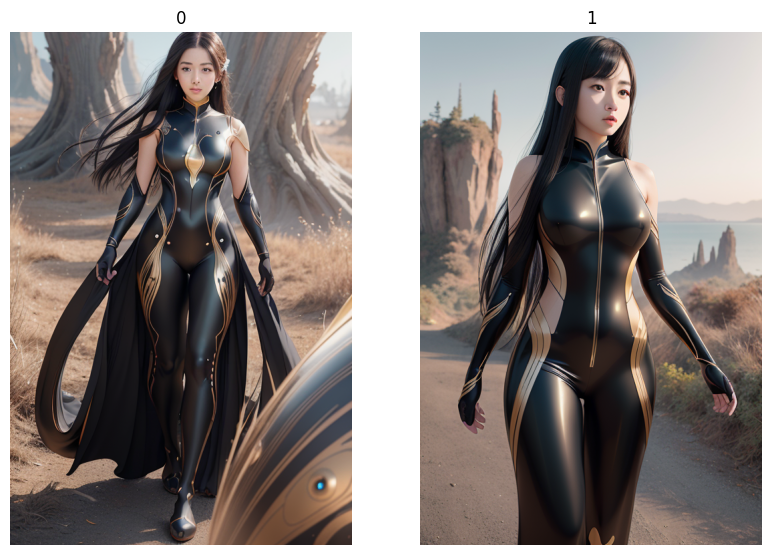

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def plot_images(images, labels = None):
    N = len(images)
    n_cols = 3
    n_rows = int(np.ceil(N / n_cols))

    if images[0].width > images[0].height:
        plt.figure(figsize = (7 * n_cols, 5 * n_rows))
    else:
        plt.figure(figsize = (5 * n_cols, 7 * n_rows))
    for i in range(len(images)):
        plt.subplot(n_rows, n_cols, i + 1)
        if labels is not None:
            plt.title(labels[i])
        plt.imshow(np.array(images[i]))
        plt.axis(False)
    plt.show()

prompt = """beautiful realistic fantastic fullbody girl warriors, high setailed suit, black gold, studio ghibli, beautiful high detail, enhanced, 8k"""

negative_prompt="(worst quality, low quality:1.4), FastNegativeEmbedding"
sdloader.seed=265132
sdloader.setClipSkip(1)
sdloader.apply_lora('blackgold-000008.safetensors', 0.7)
images = sdloader.runText2Img(prompt, negative_prompt, 30, 8, 512, 768, 2)
# sdloader.remove_lora(c)
plot_images(images, range(len(images)))

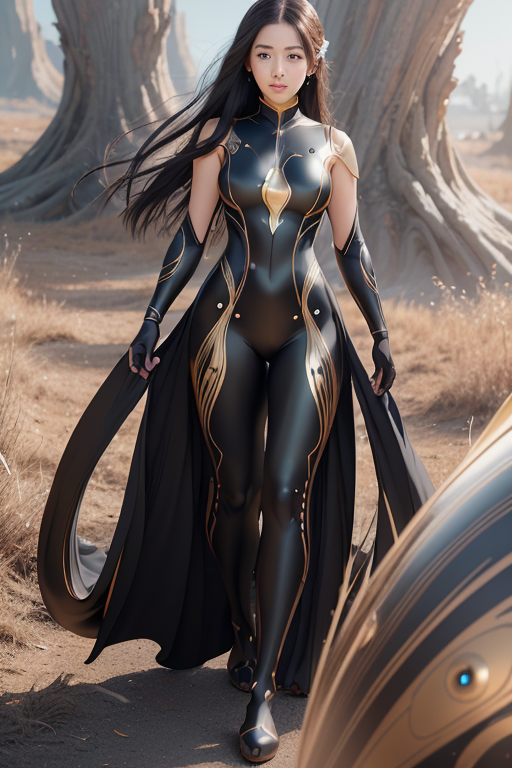

In [27]:
images[0]

In [ ]:
sdloader.unload()

In [43]:
from __future__ import annotations

from collections import OrderedDict
try:
    from typing import Literal
except ImportError:
    from typing_extensions import Literal

import torch
import torch.nn as nn


class B:
    ####################
    # Basic blocks
    ####################

    @staticmethod
    def act(act_type: str, inplace=True, neg_slope=0.2, n_prelu=1):
        # helper selecting activation
        # neg_slope: for leakyrelu and init of prelu
        # n_prelu: for p_relu num_parameters
        act_type = act_type.lower()
        if act_type == "relu":
            layer = nn.ReLU(inplace)
        elif act_type == "leakyrelu":
            layer = nn.LeakyReLU(neg_slope, inplace)
        elif act_type == "prelu":
            layer = nn.PReLU(num_parameters=n_prelu, init=neg_slope)
        else:
            raise NotImplementedError(
                "activation layer [{:s}] is not found".format(act_type)
            )
        return layer

    @staticmethod
    def norm(norm_type: str, nc: int):
        # helper selecting normalization layer
        norm_type = norm_type.lower()
        if norm_type == "batch":
            layer = nn.BatchNorm2d(nc, affine=True)
        elif norm_type == "instance":
            layer = nn.InstanceNorm2d(nc, affine=False)
        else:
            raise NotImplementedError(
                "normalization layer [{:s}] is not found".format(norm_type)
            )
        return layer

    @staticmethod
    def pad(pad_type: str, padding):
        # helper selecting padding layer
        # if padding is 'zero', do by conv layers
        pad_type = pad_type.lower()
        if padding == 0:
            return None
        if pad_type == "reflect":
            layer = nn.ReflectionPad2d(padding)
        elif pad_type == "replicate":
            layer = nn.ReplicationPad2d(padding)
        else:
            raise NotImplementedError(
                "padding layer [{:s}] is not implemented".format(pad_type)
            )
        return layer

    @staticmethod
    def get_valid_padding(kernel_size, dilation):
        kernel_size = kernel_size + (kernel_size - 1) * (dilation - 1)
        padding = (kernel_size - 1) // 2
        return padding


    class ConcatBlock(nn.Module):
        # Concat the output of a submodule to its input
        def __init__(self, submodule):
            super(B.ConcatBlock, self).__init__()
            self.sub = submodule

        def forward(self, x):
            output = torch.cat((x, self.sub(x)), dim=1)
            return output

        def __repr__(self):
            tmpstr = "Identity .. \n|"
            modstr = self.sub.__repr__().replace("\n", "\n|")
            tmpstr = tmpstr + modstr
            return tmpstr


    class ShortcutBlock(nn.Module):
        # Elementwise sum the output of a submodule to its input
        def __init__(self, submodule):
            super(B.ShortcutBlock, self).__init__()
            self.sub = submodule

        def forward(self, x):
            output = x + self.sub(x)
            return output

        def __repr__(self):
            tmpstr = "Identity + \n|"
            modstr = self.sub.__repr__().replace("\n", "\n|")
            tmpstr = tmpstr + modstr
            return tmpstr


    class ShortcutBlockSPSR(nn.Module):
        # Elementwise sum the output of a submodule to its input
        def __init__(self, submodule):
            super(B.ShortcutBlockSPSR, self).__init__()
            self.sub = submodule

        def forward(self, x):
            return x, self.sub

        def __repr__(self):
            tmpstr = "Identity + \n|"
            modstr = self.sub.__repr__().replace("\n", "\n|")
            tmpstr = tmpstr + modstr
            return tmpstr

    @staticmethod
    def sequential(*args):
        # Flatten Sequential. It unwraps nn.Sequential.
        if len(args) == 1:
            if isinstance(args[0], OrderedDict):
                raise NotImplementedError("sequential does not support OrderedDict input.")
            return args[0]  # No sequential is needed.
        modules = []
        for module in args:
            if isinstance(module, nn.Sequential):
                for submodule in module.children():
                    modules.append(submodule)
            elif isinstance(module, nn.Module):
                modules.append(module)
        return nn.Sequential(*modules)


    ConvMode = Literal["CNA", "NAC", "CNAC"]


    # 2x2x2 Conv Block
    @staticmethod
    def conv_block_2c2(
        in_nc,
        out_nc,
        act_type="relu",
    ):
        return B.sequential(
            nn.Conv2d(in_nc, out_nc, kernel_size=2, padding=1),
            nn.Conv2d(out_nc, out_nc, kernel_size=2, padding=0),
            B.act(act_type) if act_type else None,
        )

    @staticmethod
    def conv_block(
        in_nc: int,
        out_nc: int,
        kernel_size,
        stride=1,
        dilation=1,
        groups=1,
        bias=True,
        pad_type="zero",
        norm_type: str | None = None,
        act_type: str | None = "relu",
        mode: ConvMode = "CNA",
        c2x2=False,
    ):
        """
        Conv layer with padding, normalization, activation
        mode: CNA --> Conv -> Norm -> Act
            NAC --> Norm -> Act --> Conv (Identity Mappings in Deep Residual Networks, ECCV16)
        """

        if c2x2:
            return B.conv_block_2c2(in_nc, out_nc, act_type=act_type)

        assert mode in ("CNA", "NAC", "CNAC"), "Wrong conv mode [{:s}]".format(mode)
        padding = B.get_valid_padding(kernel_size, dilation)
        p = B.pad(pad_type, padding) if pad_type and pad_type != "zero" else None
        padding = padding if pad_type == "zero" else 0

        c = nn.Conv2d(
            in_nc,
            out_nc,
            kernel_size=kernel_size,
            stride=stride,
            padding=padding,
            dilation=dilation,
            bias=bias,
            groups=groups,
        )
        a = B.act(act_type) if act_type else None
        if mode in ("CNA", "CNAC"):
            n = B.norm(norm_type, out_nc) if norm_type else None
            return B.sequential(p, c, n, a)
        elif mode == "NAC":
            if norm_type is None and act_type is not None:
                a = B.act(act_type, inplace=False)
                # Important!
                # input----ReLU(inplace)----Conv--+----output
                #        |________________________|
                # inplace ReLU will modify the input, therefore wrong output
            n = B.norm(norm_type, in_nc) if norm_type else None
            return B.sequential(n, a, p, c)
        else:
            assert False, f"Invalid conv mode {mode}"


    ####################
    # Useful blocks
    ####################


    class ResNetBlock(nn.Module):
        """
        ResNet Block, 3-3 style
        with extra residual scaling used in EDSR
        (Enhanced Deep Residual Networks for Single Image Super-Resolution, CVPRW 17)
        """

        def __init__(
            self,
            in_nc,
            mid_nc,
            out_nc,
            kernel_size=3,
            stride=1,
            dilation=1,
            groups=1,
            bias=True,
            pad_type="zero",
            norm_type=None,
            act_type="relu",
            mode: B.ConvMode = "CNA",
            res_scale=1,
        ):
            super(B.ResNetBlock, self).__init__()
            conv0 = B.conv_block(
                in_nc,
                mid_nc,
                kernel_size,
                stride,
                dilation,
                groups,
                bias,
                pad_type,
                norm_type,
                act_type,
                mode,
            )
            if mode == "CNA":
                act_type = None
            if mode == "CNAC":  # Residual path: |-CNAC-|
                act_type = None
                norm_type = None
            conv1 = B.conv_block(
                mid_nc,
                out_nc,
                kernel_size,
                stride,
                dilation,
                groups,
                bias,
                pad_type,
                norm_type,
                act_type,
                mode,
            )
            # if in_nc != out_nc:
            #     self.project = conv_block(in_nc, out_nc, 1, stride, dilation, 1, bias, pad_type, \
            #         None, None)
            #     print('Need a projecter in ResNetBlock.')
            # else:
            #     self.project = lambda x:x
            self.res = B.sequential(conv0, conv1)
            self.res_scale = res_scale

        def forward(self, x):
            res = self.res(x).mul(self.res_scale)
            return x + res


    class RRDB(nn.Module):
        """
        Residual in Residual Dense Block
        (ESRGAN: Enhanced Super-Resolution Generative Adversarial Networks)
        """

        def __init__(
            self,
            nf,
            kernel_size=3,
            gc=32,
            stride=1,
            bias: bool = True,
            pad_type="zero",
            norm_type=None,
            act_type="leakyrelu",
            mode: B.ConvMode = "CNA",
            _convtype="Conv2D",
            _spectral_norm=False,
            plus=False,
            c2x2=False,
        ):
            super(B.RRDB, self).__init__()
            self.RDB1 = B.ResidualDenseBlock_5C(
                nf,
                kernel_size,
                gc,
                stride,
                bias,
                pad_type,
                norm_type,
                act_type,
                mode,
                plus=plus,
                c2x2=c2x2,
            )
            self.RDB2 = B.ResidualDenseBlock_5C(
                nf,
                kernel_size,
                gc,
                stride,
                bias,
                pad_type,
                norm_type,
                act_type,
                mode,
                plus=plus,
                c2x2=c2x2,
            )
            self.RDB3 = B.ResidualDenseBlock_5C(
                nf,
                kernel_size,
                gc,
                stride,
                bias,
                pad_type,
                norm_type,
                act_type,
                mode,
                plus=plus,
                c2x2=c2x2,
            )

        def forward(self, x):
            out = self.RDB1(x)
            out = self.RDB2(out)
            out = self.RDB3(out)
            return out * 0.2 + x


    class ResidualDenseBlock_5C(nn.Module):
        """
        Residual Dense Block
        style: 5 convs
        The core module of paper: (Residual Dense Network for Image Super-Resolution, CVPR 18)
        Modified options that can be used:
            - "Partial Convolution based Padding" arXiv:1811.11718
            - "Spectral normalization" arXiv:1802.05957
            - "ICASSP 2020 - ESRGAN+ : Further Improving ESRGAN" N. C.
                {Rakotonirina} and A. {Rasoanaivo}

        Args:
            nf (int): Channel number of intermediate features (num_feat).
            gc (int): Channels for each growth (num_grow_ch: growth channel,
                i.e. intermediate channels).
            convtype (str): the type of convolution to use. Default: 'Conv2D'
            gaussian_noise (bool): enable the ESRGAN+ gaussian noise (no new
                trainable parameters)
            plus (bool): enable the additional residual paths from ESRGAN+
                (adds trainable parameters)
        """

        def __init__(
            self,
            nf=64,
            kernel_size=3,
            gc=32,
            stride=1,
            bias: bool = True,
            pad_type="zero",
            norm_type=None,
            act_type="leakyrelu",
            mode: B.ConvMode = "CNA",
            plus=False,
            c2x2=False,
        ):
            super(B.ResidualDenseBlock_5C, self).__init__()

            ## +
            self.conv1x1 = B.conv1x1(nf, gc) if plus else None
            ## +

            self.conv1 = B.conv_block(
                nf,
                gc,
                kernel_size,
                stride,
                bias=bias,
                pad_type=pad_type,
                norm_type=norm_type,
                act_type=act_type,
                mode=mode,
                c2x2=c2x2,
            )
            self.conv2 = B.conv_block(
                nf + gc,
                gc,
                kernel_size,
                stride,
                bias=bias,
                pad_type=pad_type,
                norm_type=norm_type,
                act_type=act_type,
                mode=mode,
                c2x2=c2x2,
            )
            self.conv3 = B.conv_block(
                nf + 2 * gc,
                gc,
                kernel_size,
                stride,
                bias=bias,
                pad_type=pad_type,
                norm_type=norm_type,
                act_type=act_type,
                mode=mode,
                c2x2=c2x2,
            )
            self.conv4 = B.conv_block(
                nf + 3 * gc,
                gc,
                kernel_size,
                stride,
                bias=bias,
                pad_type=pad_type,
                norm_type=norm_type,
                act_type=act_type,
                mode=mode,
                c2x2=c2x2,
            )
            if mode == "CNA":
                last_act = None
            else:
                last_act = act_type
            self.conv5 = B.conv_block(
                nf + 4 * gc,
                nf,
                3,
                stride,
                bias=bias,
                pad_type=pad_type,
                norm_type=norm_type,
                act_type=last_act,
                mode=mode,
                c2x2=c2x2,
            )

        def forward(self, x):
            x1 = self.conv1(x)
            x2 = self.conv2(torch.cat((x, x1), 1))
            if self.conv1x1:
                # pylint: disable=not-callable
                x2 = x2 + self.conv1x1(x)  # +
            x3 = self.conv3(torch.cat((x, x1, x2), 1))
            x4 = self.conv4(torch.cat((x, x1, x2, x3), 1))
            if self.conv1x1:
                x4 = x4 + x2  # +
            x5 = self.conv5(torch.cat((x, x1, x2, x3, x4), 1))
            return x5 * 0.2 + x

    @staticmethod
    def conv1x1(in_planes, out_planes, stride=1):
        return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


    ####################
    # Upsampler
    ####################

    @staticmethod
    def pixelshuffle_block(
        in_nc: int,
        out_nc: int,
        upscale_factor=2,
        kernel_size=3,
        stride=1,
        bias=True,
        pad_type="zero",
        norm_type: str | None = None,
        act_type="relu",
    ):
        """
        Pixel shuffle layer
        (Real-Time Single Image and Video Super-Resolution Using an Efficient Sub-Pixel Convolutional
        Neural Network, CVPR17)
        """
        conv = B.conv_block(
            in_nc,
            out_nc * (upscale_factor**2),
            kernel_size,
            stride,
            bias=bias,
            pad_type=pad_type,
            norm_type=None,
            act_type=None,
        )
        pixel_shuffle = nn.PixelShuffle(upscale_factor)

        n = B.norm(norm_type, out_nc) if norm_type else None
        a = B.act(act_type) if act_type else None
        return B.sequential(conv, pixel_shuffle, n, a)

    @staticmethod
    def upconv_block(
        in_nc: int,
        out_nc: int,
        upscale_factor=2,
        kernel_size=3,
        stride=1,
        bias=True,
        pad_type="zero",
        norm_type: str | None = None,
        act_type="relu",
        mode="nearest",
        c2x2=False,
    ):
        # Up conv
        # described in https://distill.pub/2016/deconv-checkerboard/
        upsample = nn.Upsample(scale_factor=upscale_factor, mode=mode)
        conv = B.conv_block(
            in_nc,
            out_nc,
            kernel_size,
            stride,
            bias=bias,
            pad_type=pad_type,
            norm_type=norm_type,
            act_type=act_type,
            c2x2=c2x2,
        )
        return B.sequential(upsample, conv)


import re
import math
import functools
import torch.nn.functional as F

# Borrowed from https://github.com/rlaphoenix/VSGAN/blob/master/vsgan/archs/ESRGAN.py
# Which enhanced stuff that was already here
class ESRGAN(nn.Module): #RRDBNet
    def __init__(
        self,
        state_dict,
        norm=None,
        act: str = "leakyrelu",
        upsampler: str = "upconv",
        mode: B.ConvMode = "CNA",
    ) -> None:
        """
        ESRGAN - Enhanced Super-Resolution Generative Adversarial Networks.
        By Xintao Wang, Ke Yu, Shixiang Wu, Jinjin Gu, Yihao Liu, Chao Dong, Yu Qiao,
        and Chen Change Loy.
        This is old-arch Residual in Residual Dense Block Network and is not
        the newest revision that's available at github.com/xinntao/ESRGAN.
        This is on purpose, the newest Network has severely limited the
        potential use of the Network with no benefits.
        This network supports model files from both new and old-arch.
        Args:
            norm: Normalization layer
            act: Activation layer
            upsampler: Upsample layer. upconv, pixel_shuffle
            mode: Convolution mode
        """
        super(ESRGAN, self).__init__()
        self.model_arch = "ESRGAN"
        self.sub_type = "SR"

        self.state = state_dict
        self.norm = norm
        self.act = act
        self.upsampler = upsampler
        self.mode = mode

        self.state_map = {
            # currently supports old, new, and newer RRDBNet arch models
            # ESRGAN, BSRGAN/RealSR, Real-ESRGAN
            "model.0.weight": ("conv_first.weight",),
            "model.0.bias": ("conv_first.bias",),
            "model.1.sub./NB/.weight": ("trunk_conv.weight", "conv_body.weight"),
            "model.1.sub./NB/.bias": ("trunk_conv.bias", "conv_body.bias"),
            r"model.1.sub.\1.RDB\2.conv\3.0.\4": (
                r"RRDB_trunk\.(\d+)\.RDB(\d)\.conv(\d+)\.(weight|bias)",
                r"body\.(\d+)\.rdb(\d)\.conv(\d+)\.(weight|bias)",
            ),
        }
        if "params_ema" in self.state:
            self.state = self.state["params_ema"]
            # self.model_arch = "RealESRGAN"
        self.num_blocks = self.get_num_blocks()
        self.plus = any("conv1x1" in k for k in self.state.keys())
        if self.plus:
            self.model_arch = "ESRGAN+"

        self.state = self.new_to_old_arch(self.state)

        self.key_arr = list(self.state.keys())

        self.in_nc: int = self.state[self.key_arr[0]].shape[1]
        self.out_nc: int = self.state[self.key_arr[-1]].shape[0]

        self.scale: int = self.get_scale()
        self.num_filters: int = self.state[self.key_arr[0]].shape[0]

        c2x2 = False
        if self.state["model.0.weight"].shape[-2] == 2:
            c2x2 = True
            self.scale = round(math.sqrt(self.scale / 4))
            self.model_arch = "ESRGAN-2c2"

        self.supports_fp16 = True
        self.supports_bfp16 = True
        self.min_size_restriction = None

        # Detect if pixelunshuffle was used (Real-ESRGAN)
        if self.in_nc in (self.out_nc * 4, self.out_nc * 16) and self.out_nc in (
            self.in_nc / 4,
            self.in_nc / 16,
        ):
            self.shuffle_factor = int(math.sqrt(self.in_nc / self.out_nc))
        else:
            self.shuffle_factor = None

        upsample_block = {
            "upconv": B.upconv_block,
            "pixel_shuffle": B.pixelshuffle_block,
        }.get(self.upsampler)
        if upsample_block is None:
            raise NotImplementedError(f"Upsample mode [{self.upsampler}] is not found")

        if self.scale == 3:
            upsample_blocks = upsample_block(
                in_nc=self.num_filters,
                out_nc=self.num_filters,
                upscale_factor=3,
                act_type=self.act,
                c2x2=c2x2,
            )
        else:
            upsample_blocks = [
                upsample_block(
                    in_nc=self.num_filters,
                    out_nc=self.num_filters,
                    act_type=self.act,
                    c2x2=c2x2,
                )
                for _ in range(int(math.log(self.scale, 2)))
            ]

        self.model = B.sequential(
            # fea conv
            B.conv_block(
                in_nc=self.in_nc,
                out_nc=self.num_filters,
                kernel_size=3,
                norm_type=None,
                act_type=None,
                c2x2=c2x2,
            ),
            B.ShortcutBlock(
                B.sequential(
                    # rrdb blocks
                    *[
                        B.RRDB(
                            nf=self.num_filters,
                            kernel_size=3,
                            gc=32,
                            stride=1,
                            bias=True,
                            pad_type="zero",
                            norm_type=self.norm,
                            act_type=self.act,
                            mode="CNA",
                            plus=self.plus,
                            c2x2=c2x2,
                        )
                        for _ in range(self.num_blocks)
                    ],
                    # lr conv
                    B.conv_block(
                        in_nc=self.num_filters,
                        out_nc=self.num_filters,
                        kernel_size=3,
                        norm_type=self.norm,
                        act_type=None,
                        mode=self.mode,
                        c2x2=c2x2,
                    ),
                )
            ),
            *upsample_blocks,
            # hr_conv0
            B.conv_block(
                in_nc=self.num_filters,
                out_nc=self.num_filters,
                kernel_size=3,
                norm_type=None,
                act_type=self.act,
                c2x2=c2x2,
            ),
            # hr_conv1
            B.conv_block(
                in_nc=self.num_filters,
                out_nc=self.out_nc,
                kernel_size=3,
                norm_type=None,
                act_type=None,
                c2x2=c2x2,
            ),
        )

        # Adjust these properties for calculations outside of the model
        if self.shuffle_factor:
            self.in_nc //= self.shuffle_factor**2
            self.scale //= self.shuffle_factor

        self.load_state_dict(self.state, strict=False)

    def new_to_old_arch(self, state):
        """Convert a new-arch model state dictionary to an old-arch dictionary."""
        if "params_ema" in state:
            state = state["params_ema"]

        if "conv_first.weight" not in state:
            # model is already old arch, this is a loose check, but should be sufficient
            return state

        # add nb to state keys
        for kind in ("weight", "bias"):
            self.state_map[f"model.1.sub.{self.num_blocks}.{kind}"] = self.state_map[
                f"model.1.sub./NB/.{kind}"
            ]
            del self.state_map[f"model.1.sub./NB/.{kind}"]

        old_state = OrderedDict()
        for old_key, new_keys in self.state_map.items():
            for new_key in new_keys:
                if r"\1" in old_key:
                    for k, v in state.items():
                        sub = re.sub(new_key, old_key, k)
                        if sub != k:
                            old_state[sub] = v
                else:
                    if new_key in state:
                        old_state[old_key] = state[new_key]

        # upconv layers
        max_upconv = 0
        for key in state.keys():
            match = re.match(r"(upconv|conv_up)(\d)\.(weight|bias)", key)
            if match is not None:
                _, key_num, key_type = match.groups()
                old_state[f"model.{int(key_num) * 3}.{key_type}"] = state[key]
                max_upconv = max(max_upconv, int(key_num) * 3)

        # final layers
        for key in state.keys():
            if key in ("HRconv.weight", "conv_hr.weight"):
                old_state[f"model.{max_upconv + 2}.weight"] = state[key]
            elif key in ("HRconv.bias", "conv_hr.bias"):
                old_state[f"model.{max_upconv + 2}.bias"] = state[key]
            elif key in ("conv_last.weight",):
                old_state[f"model.{max_upconv + 4}.weight"] = state[key]
            elif key in ("conv_last.bias",):
                old_state[f"model.{max_upconv + 4}.bias"] = state[key]

        # Sort by first numeric value of each layer
        def compare(item1, item2):
            parts1 = item1.split(".")
            parts2 = item2.split(".")
            int1 = int(parts1[1])
            int2 = int(parts2[1])
            return int1 - int2

        sorted_keys = sorted(old_state.keys(), key=functools.cmp_to_key(compare))

        # Rebuild the output dict in the right order
        out_dict = OrderedDict((k, old_state[k]) for k in sorted_keys)

        return out_dict

    def get_scale(self, min_part: int = 6) -> int:
        n = 0
        for part in list(self.state):
            parts = part.split(".")[1:]
            if len(parts) == 2:
                part_num = int(parts[0])
                if part_num > min_part and parts[1] == "weight":
                    n += 1
        return 2**n

    def get_num_blocks(self) -> int:
        nbs = []
        state_keys = self.state_map[r"model.1.sub.\1.RDB\2.conv\3.0.\4"] + (
            r"model\.\d+\.sub\.(\d+)\.RDB(\d+)\.conv(\d+)\.0\.(weight|bias)",
        )
        for state_key in state_keys:
            for k in self.state:
                m = re.search(state_key, k)
                if m:
                    nbs.append(int(m.group(1)))
            if nbs:
                break
        return max(*nbs) + 1

    def forward(self, x):
        if self.shuffle_factor:
            _, _, h, w = x.size()
            mod_pad_h = (
                self.shuffle_factor - h % self.shuffle_factor
            ) % self.shuffle_factor
            mod_pad_w = (
                self.shuffle_factor - w % self.shuffle_factor
            ) % self.shuffle_factor
            x = F.pad(x, (0, mod_pad_w, 0, mod_pad_h), "reflect")
            x = torch.pixel_unshuffle(x, downscale_factor=self.shuffle_factor)
            x = self.model(x)
            return x[:, :, : h * self.scale, : w * self.scale]
        return self.model(x)


class UnsupportedModel(Exception):
    pass


try:
    OOM_EXCEPTION = torch.cuda.OutOfMemoryError
except:
    OOM_EXCEPTION = Exception


class UpscaleModel:
    def __init__(self) -> None:
        pass

    def load_state_dict(self, state_dict):
        state_dict_keys = list(state_dict.keys())

        if "params_ema" in state_dict_keys:
            state_dict = state_dict["params_ema"]
        elif "params-ema" in state_dict_keys:
            state_dict = state_dict["params-ema"]
        elif "params" in state_dict_keys:
            state_dict = state_dict["params"]

        # Regular ESRGAN, "new-arch" ESRGAN, Real-ESRGAN v1
        try:
            model = ESRGAN(state_dict)
        except:
            # pylint: disable=raise-missing-from
            raise UnsupportedModel
        return model

    def load_torch_file(self, ckpt, safe_load=False, device=None):
        if device is None:
            device = torch.device("cpu")
        if ckpt.lower().endswith(".safetensors"):
            sd = safetensors.torch.load_file(ckpt, device=device.type)
        else:
            if safe_load:
                if not 'weights_only' in torch.load.__code__.co_varnames:
                    print("Warning torch.load doesn't support weights_only on this pytorch version, loading unsafely.")
                    safe_load = False
            if safe_load:
                pl_sd = torch.load(ckpt, map_location=device, weights_only=True)
            else:
                pl_sd = torch.load(ckpt, map_location=device, weights_only=True)
                # pl_sd = torch.load(ckpt, map_location=device, pickle_module=comfy.checkpoint_pickle) i removed this
            if "global_step" in pl_sd:
                print(f"Global Step: {pl_sd['global_step']}")
            if "state_dict" in pl_sd:
                sd = pl_sd["state_dict"]
            else:
                sd = pl_sd
        return sd

    def state_dict_prefix_replace(self, state_dict, replace_prefix, filter_keys=False):
        if filter_keys:
            out = {}
        else:
            out = state_dict
        for rp in replace_prefix:
            replace = list(map(lambda a: (a, "{}{}".format(replace_prefix[rp], a[len(rp):])), filter(lambda a: a.startswith(rp), state_dict.keys())))
            for x in replace:
                w = state_dict.pop(x[0])
                out[x[1]] = w
        return out

    def load_model(self, model_name):
        model_path = modelpaths.upscale + '/' + model_name
        if not os.path.exists(model_path):
            print(f'{model_name} not found!')
            return

        sd = self.load_torch_file(model_path, safe_load=True)
        if "module.layers.0.residual_group.blocks.0.norm1.weight" in sd:
            sd = self.state_dict_prefix_replace(sd, {"module.":""})
        out = self.load_state_dict(sd).eval()
        return out

    def get_tiled_scale_steps(self, width, height, tile_x, tile_y, overlap):
        return math.ceil((height / (tile_y - overlap))) * math.ceil((width / (tile_x - overlap)))

    @torch.inference_mode()
    def tiled_scale(self, samples, function, tile_x=64, tile_y=64, overlap = 8, upscale_amount = 4, out_channels = 3, pbar = None):
        output = torch.empty((samples.shape[0], out_channels, round(samples.shape[2] * upscale_amount), round(samples.shape[3] * upscale_amount)), device="cpu")
        for b in range(samples.shape[0]):
            s = samples[b:b+1]
            out = torch.zeros((s.shape[0], out_channels, round(s.shape[2] * upscale_amount), round(s.shape[3] * upscale_amount)), device="cpu")
            out_div = torch.zeros((s.shape[0], out_channels, round(s.shape[2] * upscale_amount), round(s.shape[3] * upscale_amount)), device="cpu")
            for y in range(0, s.shape[2], tile_y - overlap):
                for x in range(0, s.shape[3], tile_x - overlap):
                    s_in = s[:,:,y:y+tile_y,x:x+tile_x]

                    ps = function(s_in).cpu()
                    mask = torch.ones_like(ps)
                    feather = round(overlap * upscale_amount)
                    for t in range(feather):
                            mask[:,:,t:1+t,:] *= ((1.0/feather) * (t + 1))
                            mask[:,:,mask.shape[2] -1 -t: mask.shape[2]-t,:] *= ((1.0/feather) * (t + 1))
                            mask[:,:,:,t:1+t] *= ((1.0/feather) * (t + 1))
                            mask[:,:,:,mask.shape[3]- 1 - t: mask.shape[3]- t] *= ((1.0/feather) * (t + 1))
                    out[:,:,round(y*upscale_amount):round((y+tile_y)*upscale_amount),round(x*upscale_amount):round((x+tile_x)*upscale_amount)] += ps * mask
                    out_div[:,:,round(y*upscale_amount):round((y+tile_y)*upscale_amount),round(x*upscale_amount):round((x+tile_x)*upscale_amount)] += mask
                    if pbar is not None:
                        pbar.update(1)

            output[b:b+1] = out/out_div
        return output

    def upscale(self, upscale_model, image):
            device = torch.device(torch.cuda.current_device())
            upscale_model.to(device)
            in_img = image.movedim(-1,-3).to(device)

            tile = 512
            overlap = 32

            oom = True
            while oom:
                try:
                    steps = in_img.shape[0] * self.get_tiled_scale_steps(in_img.shape[3], in_img.shape[2], tile_x=tile, tile_y=tile, overlap=overlap)
                    s = self.tiled_scale(in_img, lambda a: upscale_model(a), tile_x=tile, tile_y=tile, overlap=overlap, upscale_amount=upscale_model.scale, pbar=None)
                    oom = False
                except OOM_EXCEPTION as e:
                    tile //= 2
                    if tile < 128:
                        raise e

            upscale_model.cpu()
            s = torch.clamp(s.movedim(-3,-1), min=0, max=1.0)
            return s

In [ ]:
download("https://huggingface.co/sberbank-ai/Real-ESRGAN/resolve/main/RealESRGAN_x2.pth", 'RealESRGAN_x2.pth', modelpaths.upscale)
download('https://huggingface.co/uwg/upscaler/resolve/main/ESRGAN/4x-UltraSharp.pth', '4x-UltraSharp.pth', modelpaths.upscale)

In [44]:
umodel = UpscaleModel()
model = umodel.load_model('4x-UltraSharp.pth')

In [ ]:
image = images[0].convert("RGB")
image = np.array(image).astype(np.float32) / 255.0
image

In [ ]:
from PIL import Image, ImageOps

def load_image(self, image_path):
    i = Image.open(image_path)
    i = ImageOps.exif_transpose(i)
    image = i.convert("RGB")
    image = np.array(image).astype(np.float32) / 255.0
    image = torch.from_numpy(image)[None,]
    return image

image = images[0].convert("RGB")
image = np.array(image).astype(np.float32) / 255.0
image = torch.from_numpy(image)[None,]

im = umodel.upscale(model, image)

i = 255. * im.cpu().numpy()


In [51]:
img = np.clip(i, 0, 255).astype(np.uint8)
img

In [53]:
img = Image.fromarray(img[0])
img

TypeError: ignored